Titanic Survival: Random Forest Model
=====
In this notebook, we're using data from Kaggle's Titanic Dataset. We are also using scikit-learn, numpy, pandas, and matplotlib. We have various data on passengers, including ticket price, cabin location, etc. From this and some survival data, we create a random forest model to predict the survival of a passenger, given the above information about them. This implemented model achieved a 76.5% accuracy rating on Kaggle.

## Loading and Preparing Data

In [66]:
#Importing modules and checking all
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
print(os.listdir('all'))

['gender_submission.csv', 'test.csv', 'train.csv']


In [225]:
#Establishing dataframes
test_raw = pd.read_csv('all/test.csv')
train_raw = pd.read_csv('all/train.csv')

display(test_raw)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [328]:
#Splitting features and predictions for training/testing, one-hot encoding, imputing

def prepData(df):
    df = df[['Age', 'Fare', 'Sex', 'SibSp', 'Parch', 'Pclass']]
    
    x = pd.get_dummies(df)
    x = x.fillna(x.mean())
    
    return x
    
train_y = train_raw.Survived
train_x = prepData(train_raw)
test_x = prepData(test_raw)
display(test_x)

,Age,Fare,SibSp,Parch,Pclass,Sex_female,Sex_male
0,34.50000,7.8292,0,0,3,0,1
1,47.00000,7.0000,1,0,3,1,0
2,62.00000,9.6875,0,0,2,0,1
3,27.00000,8.6625,0,0,3,0,1
4,22.00000,12.2875,1,1,3,1,0
5,14.00000,9.2250,0,0,3,0,1
6,30.00000,7.6292,0,0,3,1,0
7,26.00000,29.0000,1,1,2,0,1
8,18.00000,7.2292,0,0,3,1,0
9,21.00000,24.1500,2,0,3,0,1


## Building Model

Now that the data is prepared, we use a random forest to build our prediction model. First, though, we perform some hyperparameter tuning. We create a function for the max depth and number of trees vs. our accuracy with cross-validation. We then find the minimum and use it for our model.

In [482]:
#Training randforest, finding scores for different depths

from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import learning_curve

scores_depth = []
for i in range(2,100):
    model = rf(max_depth=i)
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=3)
    final_score = np.mean(test_scores, axis=1)[-1]
    scores_depth.append(final_score)

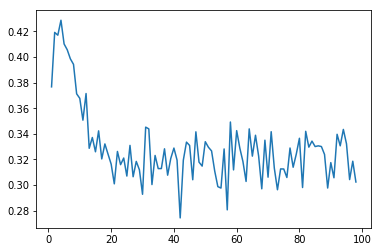

In [483]:
#Finding optimal random forest depth
optimal_depth = scores_depth.index(np.min(scores_depth)) + 2
plt.plot(range(1,len(scores_depth)+1), scores_depth)
plt.show()

In [386]:
#Finding optimal number of trees in forest
scores_estimators = []
for i in range(1,30):
    model = rf(max_depth=optimal_depth, n_estimators=i)
    train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=3)
    final_score = np.mean(test_scores, axis=1)[-1]
    scores_estimators.append(final_score)

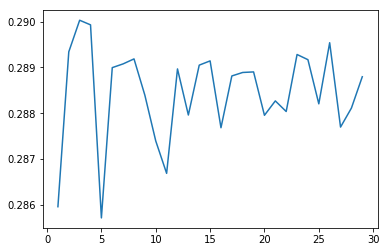

In [387]:
optimal_estimators = scores_estimators.index(np.min(scores_estimators)) + 1
plt.plot(range(1,30), scores_estimators)
plt.show()

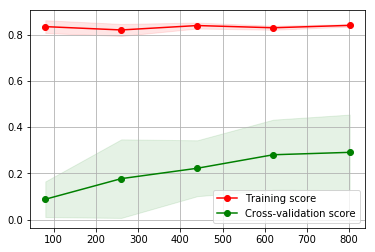

891


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=43,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [486]:
#Plotting Learning Curve

model = rf(max_depth = optimal_depth, n_estimators = optimal_estimators)
train_sizes, train_scores, test_scores = learning_curve(model, train_x, train_y, cv=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
plt.legend()
plt.show()

print(len(train_x))
model.fit(train_x, train_y)

## Making Predictions

Now that our parameters our set, we build our model, fit it, and make our predictions. They are then saved as a csv file to the disk.

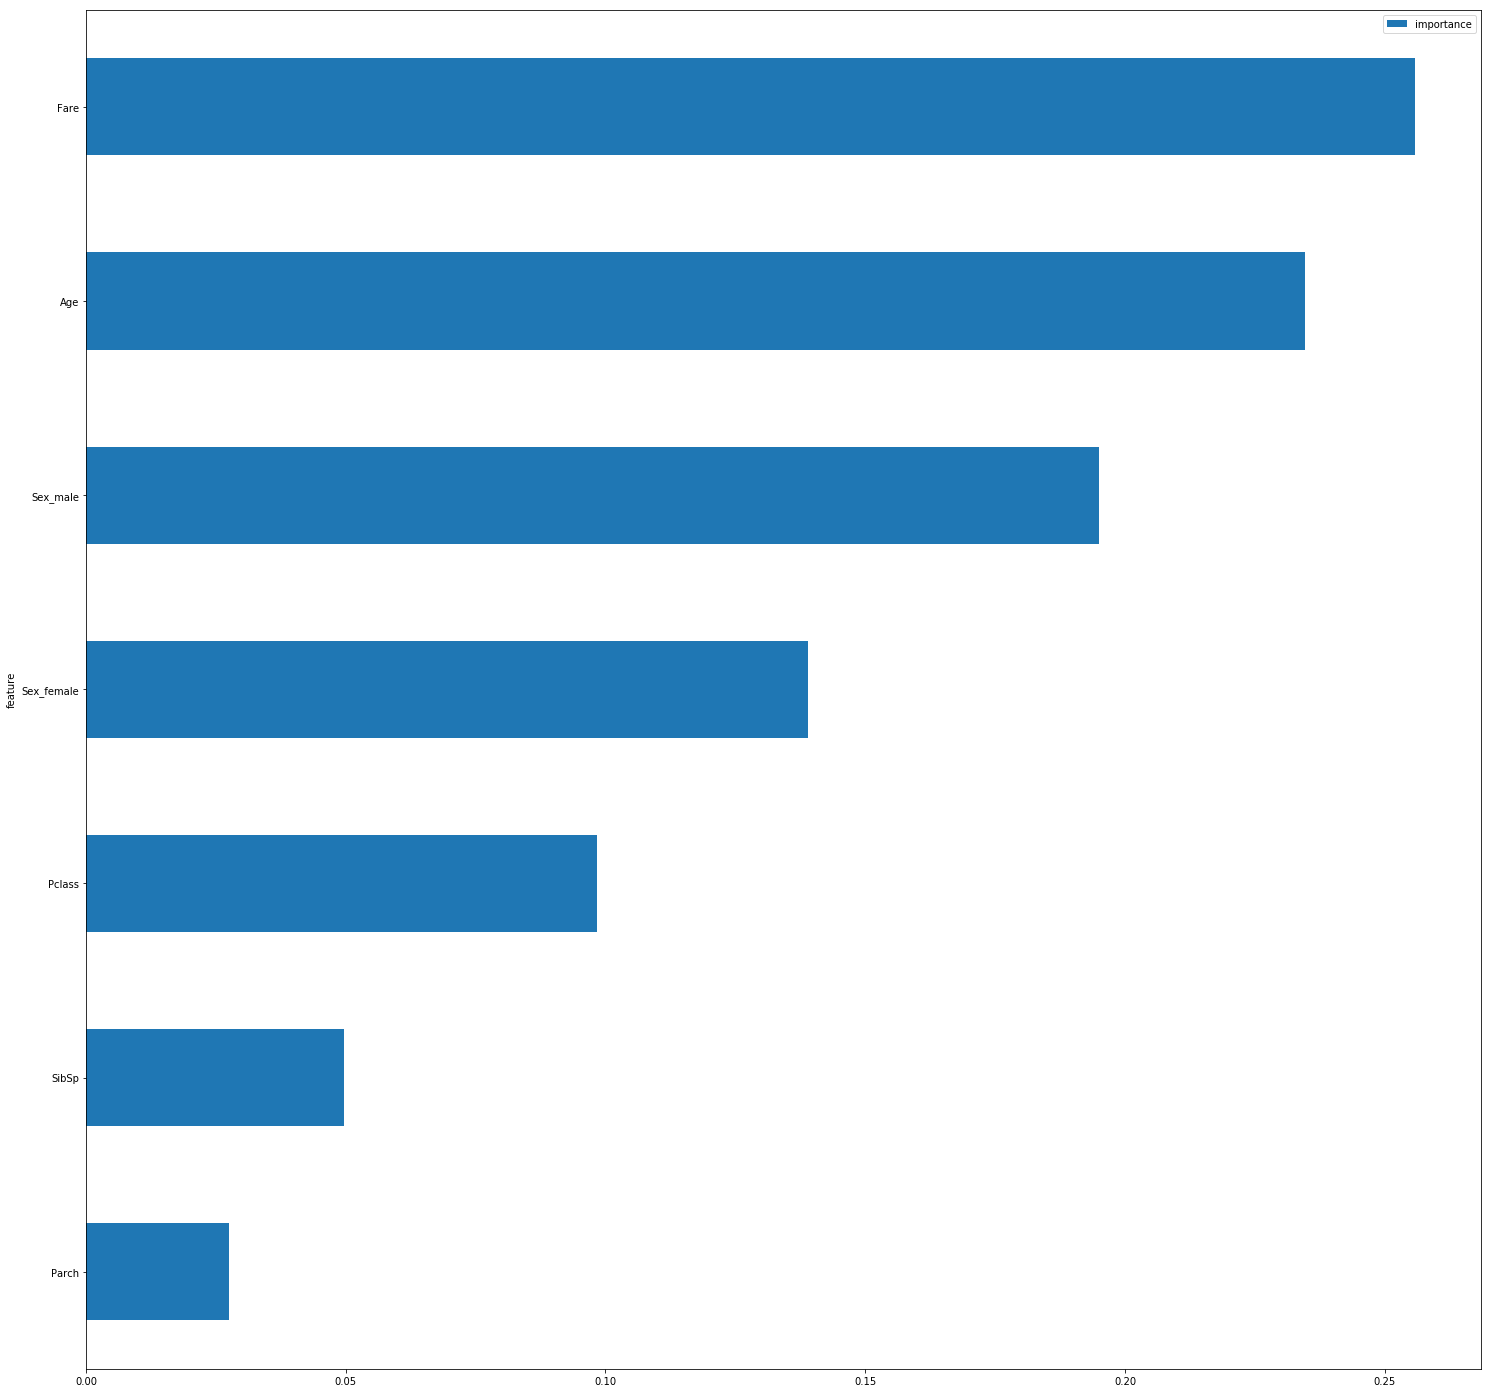

In [487]:
#Building Model
model = rf(max_depth=optimal_depth, n_estimators=optimal_estimators)
model.fit(train_x, train_y)

#Checking which features are most important in our model
features = pd.DataFrame()
features['feature'] = test_x.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind="barh", figsize=(25,25))
plt.show()

In [395]:
d = zip(test_raw.PassengerId, (int(round(x)) for x in model.predict(test_x)))

predictions = pd.DataFrame(data=d, columns=['PassengerId', 'Survived'])
predictions.to_csv('predictions.csv', index=False)
display(predictions)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
